## Obesity Levels Based On Eating Habits and Physical Condition

### The dataset contains 2111 rows and 17 columns, with a mix of categorical and numerical variables. Here's a breakdown of the key columns:

- Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE: **Numerical variables**

- Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad: **Categorical variables**

### Dataset

Each row in the dataset represents one individual eating habits and physical condition and nutritional behavior. Columns with the description :
- **Gender** - Male or Female
- **Age**:  A person's age may affect their metabolic rate and lifestyle, influencing obesity levels.
- **Height**: Useful for calculating Body Mass Index (BMI), which is closely related to obesity.
- **Weight**: One of the most critical variables for determining obesity.
- **Family_History_with_Overweight**: Whether a person has a genetic predisposition to being overweight or obese, which can significantly impact obesity risk.
- **FAVC** (Frequent Consumption of High-Calorie Food): This reflects dietary habits, particularly the consumption of high-calorie foods, which is a known risk factor for obesity.
- **FCVC** (Frequency of Consumption of Vegetables): A higher intake of vegetables is typically associated with a healthier diet and lower risk of obesity.
- **NCP** (Number of Meals): The number of meals consumed daily can impact weight gain, especially if portion sizes are not controlled.
- **CAEC** (Consumption of Food Between Meals): Eating snacks or meals outside of regular eating hours can contribute to weight gain.
- **SMOKE** (Smoking Habit): Smoking status can influence metabolism and overall health, affecting obesity.
- **CH20** (Water Intake: Adequate water intake can aid in digestion and prevent overeating, indirectly influencing weight management.
- **CALC** (Calories Consumed): Regular or frequent alcohol consumption adds extra calories, contributing to weight gain.
- **FAF** (Physical Activity Frequency): Frequency of physical activity is a key factor in energy expenditure and weight control.
- **TUE** (Time Spent Using Technology): Time spent on technology or screens is often linked to sedentary behavior, which can contribute to obesity.
- **MTRANS** (Transportation Mode): The mode of transportation, such as walking or using public transportation, reflects levels of physical activity in daily life.

The target column is **NObeyesdad** - Obesity level, which we will try to predict based on the other features in the dataset.

*Attributes related with eating habits are:*

    - Frequent consumption of high caloric food (FAVC),

    - Frequency of consumption of vegetables (FCVC),

    - Number of main meals (NCP),

    - Consumption of food between meals (CAEC),

    - Consumption of water daily (CH20),

    - Consumption of alcohol (CALC).


*Attributes related with the physical condition are:*

    - Calories consumption monitoring (SCC),

    - Physical activity frequency (FAF),

    - Time using technology devices (TUE),

    - Transportation used (MTRANS),

*Other variables were:*

    - Gender

    - Age

    - Height

    - Weight

This dataset was obtained from the UCI Machine Learning Repository, a well-known resource for datasets in the machine learning community.

### Import required packages and dataset


In [56]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

### Load the data set into dataframe

In [57]:
# Load the dataset
obesity_df = pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity_df.shape

(2111, 17)

### Display basic information about the dataset

In [58]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [59]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [60]:
obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data Preprocessing

### Missing values or null values

In [61]:
# Find missing values

obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [62]:
obesity_df.isnull().sum() # check for null values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [63]:
# Get unique values for all columns
unique_values_per_column = {col: obesity_df[col].unique() for col in obesity_df.columns}
# Display unique values for each column
for col, unique_vals in unique_values_per_column.items():
    print(f"Unique values in '{col}': {unique_vals}")


Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Age': [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Unique values in 'Height': [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Unique values in 'Weight': [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['no' 'yes']
Unique values in 'FCVC': [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606

### Observation - No missing values was found in the dataset.

### Duplicated Values

In [64]:
# Find duplicated values

obesity_df.duplicated().sum()

24

### Observation - 24 values are duplicate

In [65]:
# Show duplicated values

obesity_df[obesity_df.duplicated(keep=False)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


### Question - Should we remove duplicate enteries here?

### Outliers detection

In [66]:
def find_outliers_IQR(df,numeric_col):
   
   q1=df[numeric_col].quantile(0.25)
   q3=df[numeric_col].quantile(0.75)
   IQR=q3-q1
   outliers = df[((df[numeric_col]<(q1-1.5*IQR)) | (df[numeric_col]>(q3+1.5*IQR)))]
   return outliers

In [67]:
numeric_columns = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
for column in numeric_columns:
    outliers = find_outliers_IQR(obesity_df, column)
    print(f"{len(outliers)} outliers detected in column {column}")
    print("Max outlier value:", str(outliers[column].max()))
    print("Min outlier value:", str(outliers[column].min()))
   

168 outliers detected in column Age
Max outlier value: 61.0
Min outlier value: 35.125401
1 outliers detected in column Height
Max outlier value: 1.98
Min outlier value: 1.98
1 outliers detected in column Weight
Max outlier value: 173.0
Min outlier value: 173.0
0 outliers detected in column FCVC
Max outlier value: nan
Min outlier value: nan
579 outliers detected in column NCP
Max outlier value: 4.0
Min outlier value: 1.0
0 outliers detected in column CH2O
Max outlier value: nan
Min outlier value: nan
0 outliers detected in column FAF
Max outlier value: nan
Min outlier value: nan
0 outliers detected in column TUE
Max outlier value: nan
Min outlier value: nan


### Observation - 
NCP is number of meals consumed daily and its values are known to fall between 1 and 4. Therefpre, we can confidently conclude that there are no outliers in this variable. 

We will explore the Age variable in greater detail using a box plot in the data visualization section.

### Data Visulaization

### 1. Age distribution across different obesity levels (NObeyesdad)

/var/folders/mx/wmp0fhkx7bv5my3zvkgnkwj80000gn/T/ipykernel_50873/609797373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Age', data=obesity_df, palette='Set3')


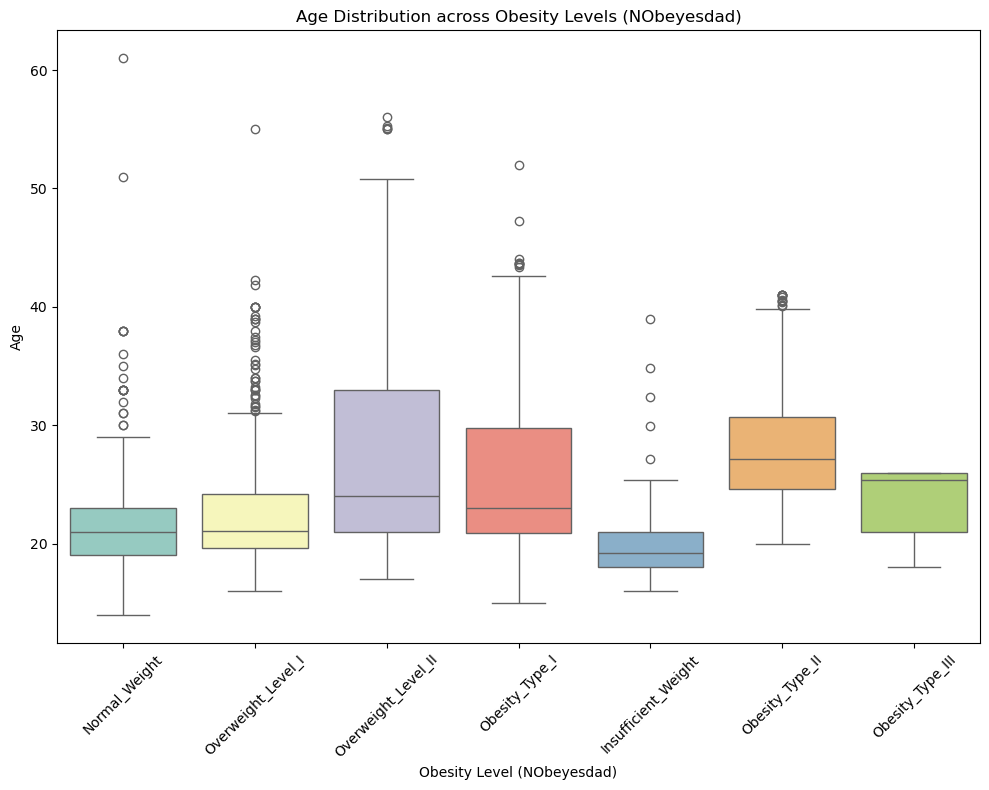

In [68]:
# Age distribution across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
sns.boxplot(x='NObeyesdad', y='Age', data=obesity_df, palette='Set3')
plt.title('Age Distribution across Obesity Levels (NObeyesdad)')
plt.xlabel('Obesity Level (NObeyesdad)')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation - Age variable ranges between 14 and 61, and at this point, we have decided not to remove any data as outliers from the dataset.

### 2. Distribution of different target labels (NObeyesdad)

/var/folders/mx/wmp0fhkx7bv5my3zvkgnkwj80000gn/T/ipykernel_50873/2662596527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=obesity_df, palette='Set3')


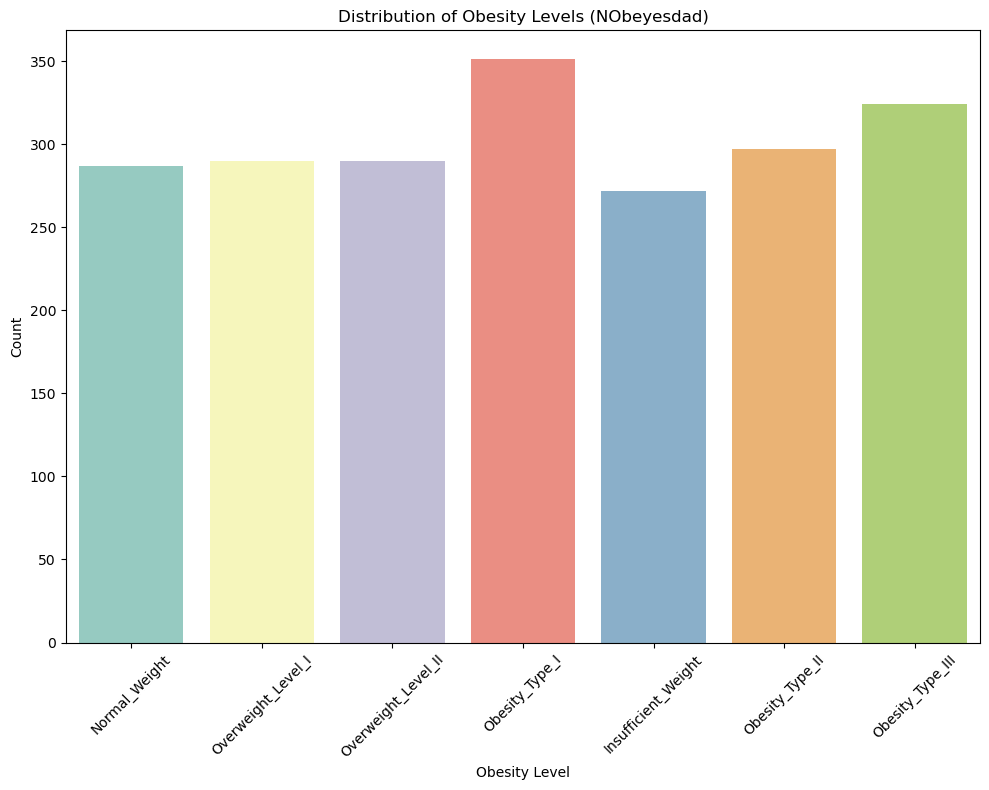

In [69]:


plt.figure(figsize=(10,8))
sns.countplot(x='NObeyesdad', data=obesity_df, palette='Set3')
plt.title('Distribution of Obesity Levels (NObeyesdad)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation  - We can see Obesity type I has highest percentage 

### 3. Draw Pairplot to explore relationships between numerical variables

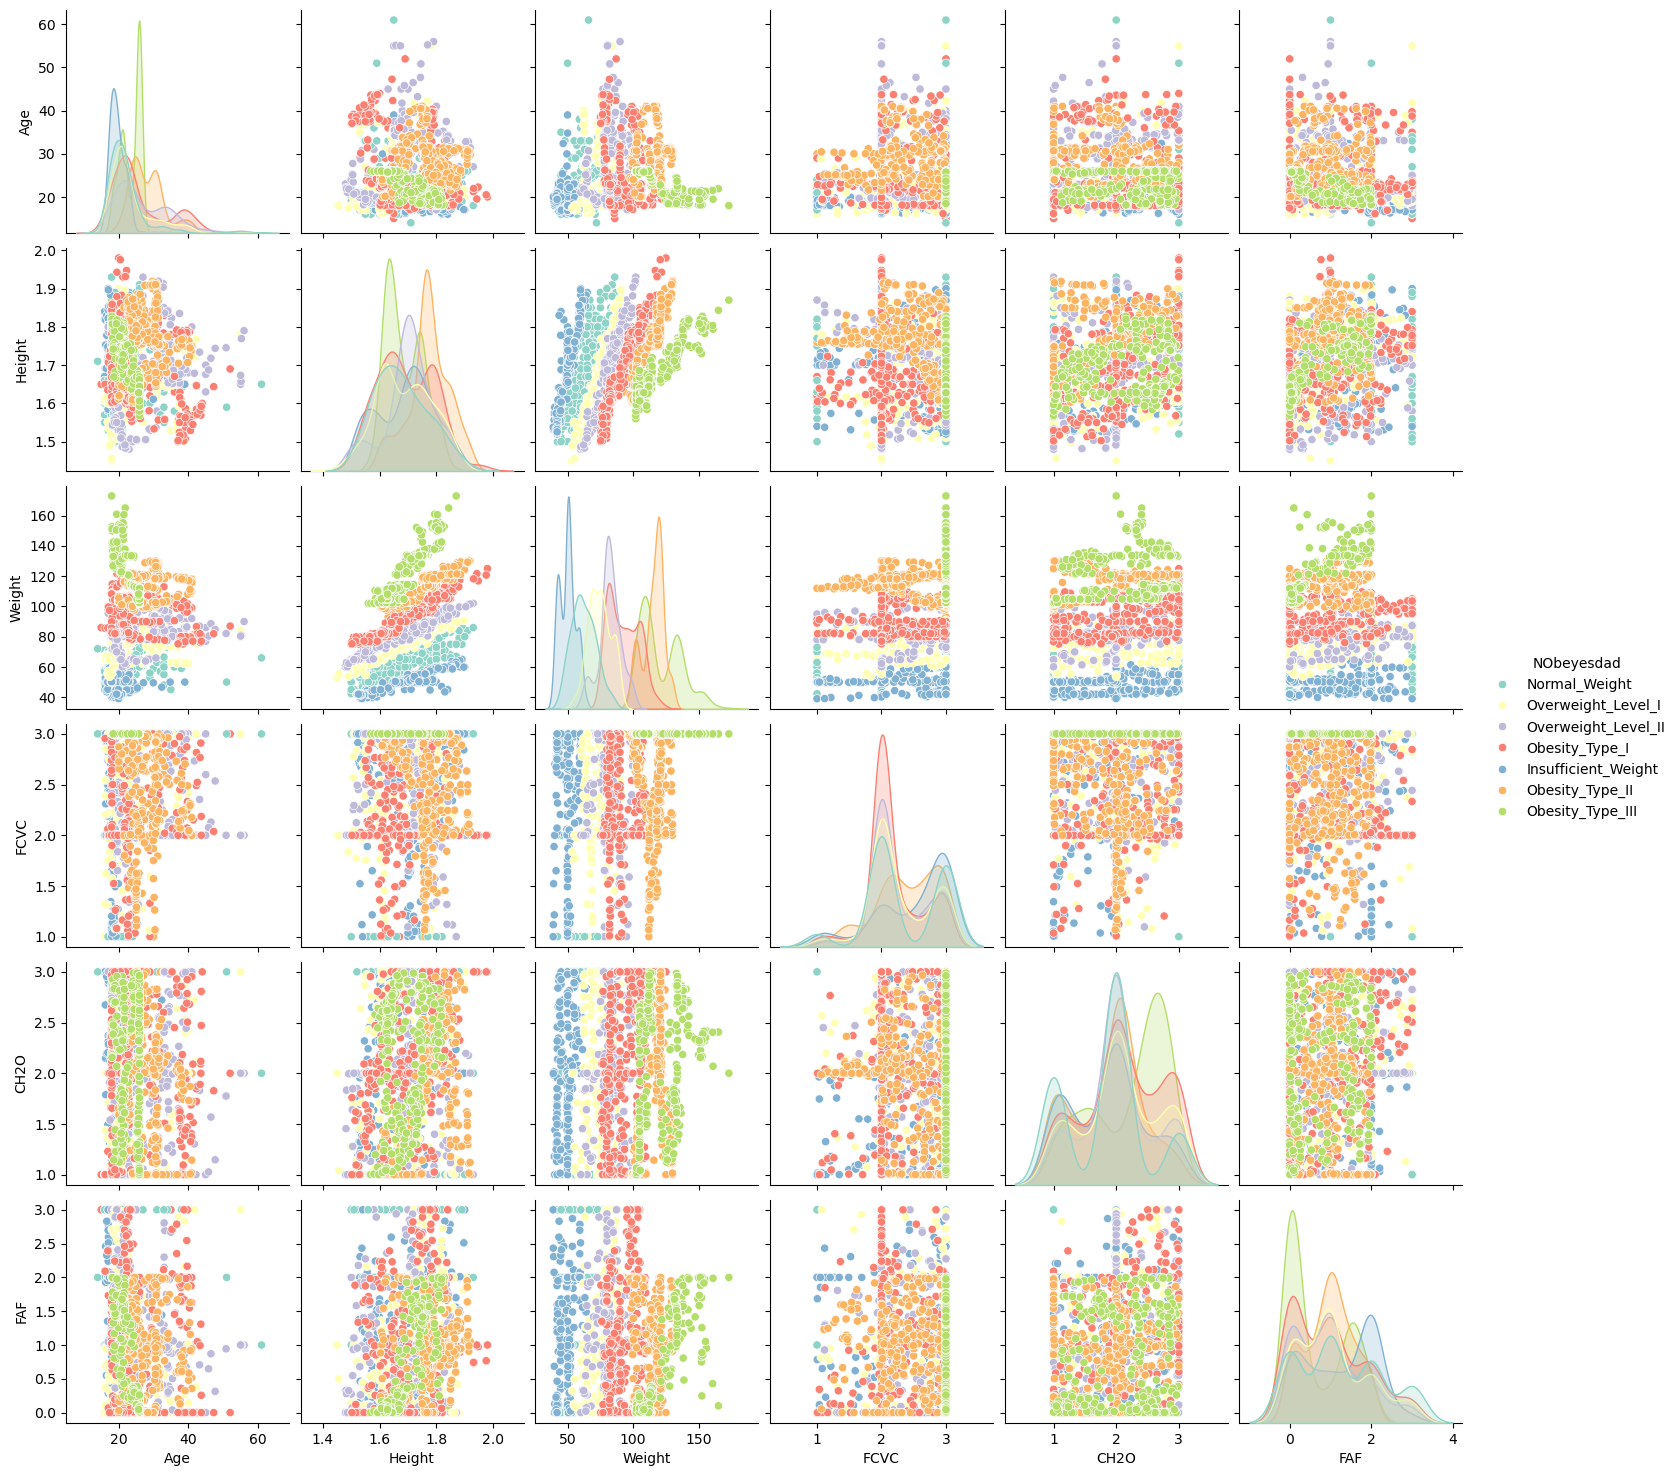

In [70]:


sns.pairplot(obesity_df[['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'NObeyesdad']], hue='NObeyesdad', palette='Set3')
plt.show()

### 4. Correlation Analysis

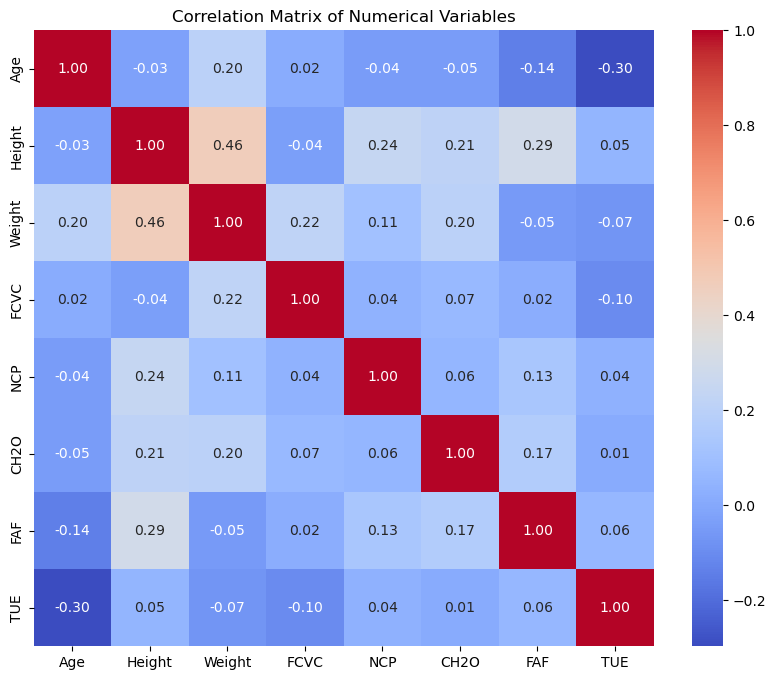

In [71]:
# Let's start by performing correlation analysis, pair plots, and creating distribution plots.
# Create a heatmap for the correlation matrix using only numerical columns
# Automatically select numerical columns
numerical_columns = obesity_df.select_dtypes(include=['float64', 'int64']).columns
numerical_correlation_matrix = obesity_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Observation - We noticed a relatively strong positive correlation between the Weight and Height. 

We will define a new variable (BMI = Weight/Height^2).

### Categorical Column relationship with target

In [72]:
categorical_var = obesity_df.select_dtypes(include=['object']).columns
categorical_var

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

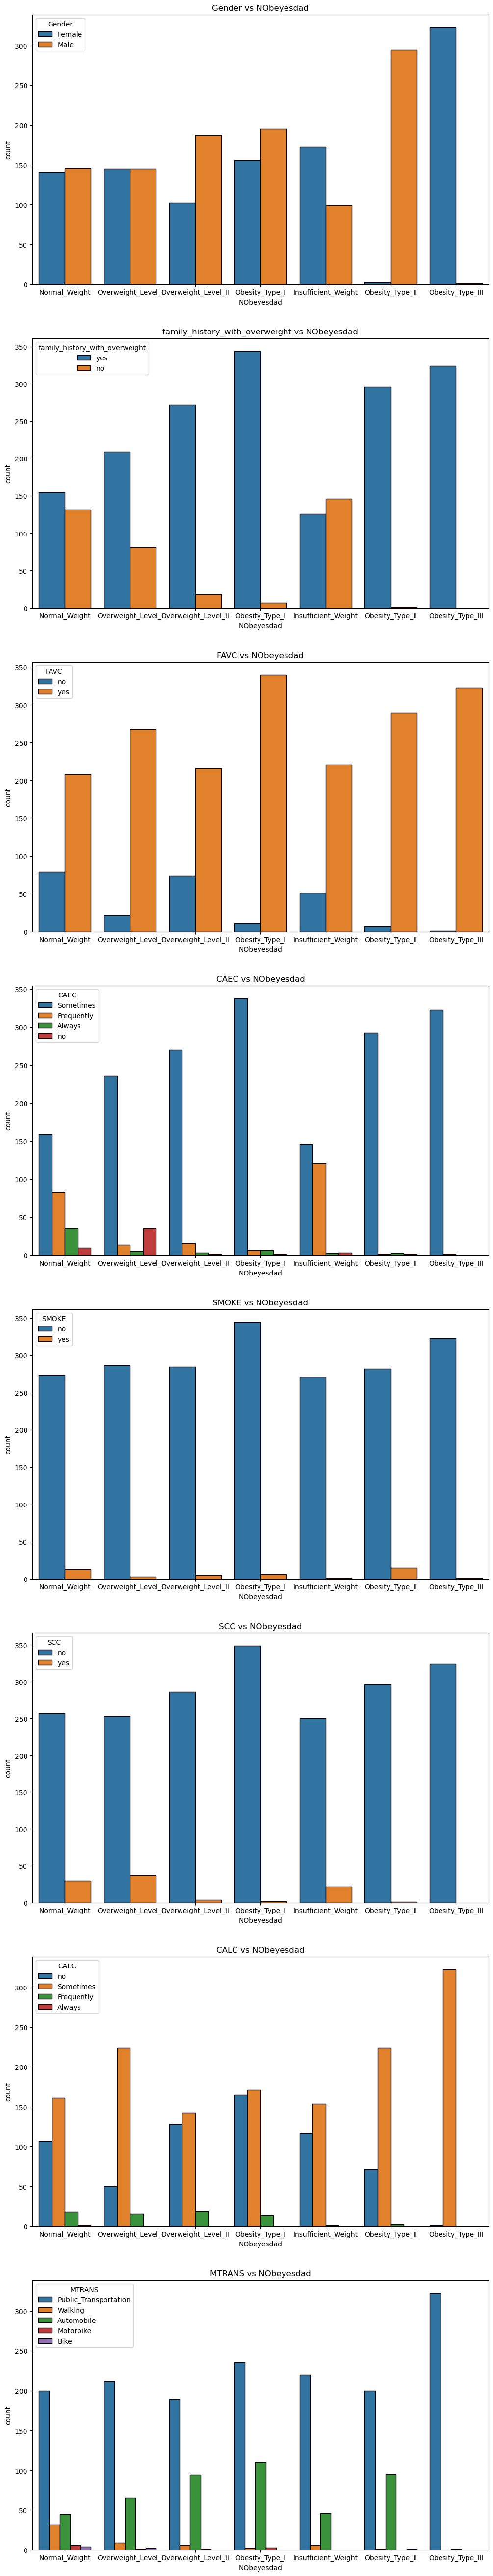

In [73]:

plt.figure(figsize = (12,170))
counter =1
for var in categorical_var:
    if counter < len(categorical_var):
        plt.subplot(20,1,counter)
        plt.title(f"{var} vs NObeyesdad")
        sns.countplot(x = "NObeyesdad" , hue = var, data = obesity_df,edgecolor="black")
    counter +=1
plt.show()

### Feature Enginerring - Adding a new column **BMI** and explore its relationship with other features.

In [74]:
# Define new variable of BMI

obesity_df['BMI'] = obesity_df['Weight'] / (obesity_df['Height'] ** 2)

/var/folders/mx/wmp0fhkx7bv5my3zvkgnkwj80000gn/T/ipykernel_50873/243993628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='BMI', data=obesity_df, palette='Set3', order=nobeyesdad_order)


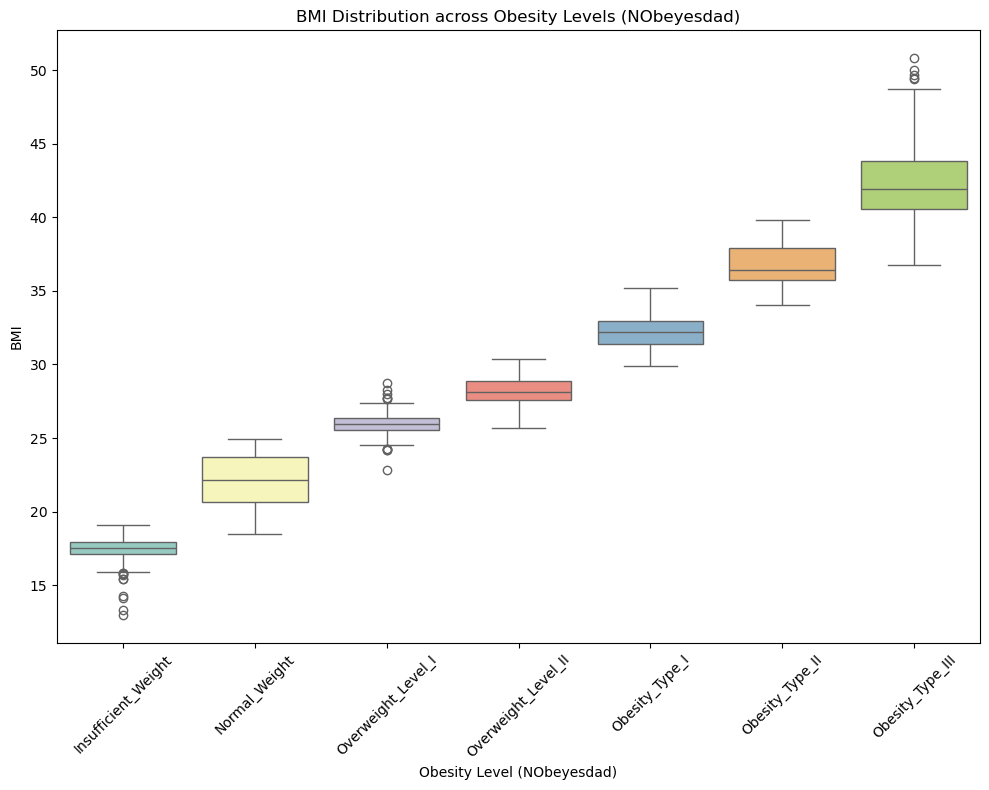

In [75]:
# BMI distribution across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
nobeyesdad_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']  # Adjust according to your dataset
sns.boxplot(x='NObeyesdad', y='BMI', data=obesity_df, palette='Set3', order=nobeyesdad_order)
plt.title('BMI Distribution across Obesity Levels (NObeyesdad)')
plt.xlabel('Obesity Level (NObeyesdad)')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The box plot effectively illustrates how BMI increases progressively with the severity of obesity levels. The spread of the data becomes wider with higher obesity categories, indicating more variation in BMI as obesity severity increases. Conversely, the Normal Weight and Insufficient Weight categories show more tightly grouped BMI distributions.